<a href="https://colab.research.google.com/github/Liping-LZ/BDAI_2324/blob/main/Regression/WM9G1_BDAI_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Multiple Linear Regression

Multiple Linear Regression (MLR) is an extension of Simple Linear Regression that allows us to predict an outcome based on multiple predictors. This technique is widely used in predictive modeling and is fundamental in the field of machine learning for understanding and predicting data.

## What is Linear Regression?

Linear Regression is a statistical method that models the relationship between a dependent variable and one (Simple Linear Regression) or more (Multiple Linear Regression) independent variables. The goal is to find a linear relationship between these variables to predict outcomes.

### Equation of Linear Regression

The equation for a Simple Linear Regression is:

$$
y = \beta_0 + \beta_1x + \epsilon
$$

Where:
- $y$ is the dependent variable we are trying to predict,
- $x$ is the independent variable we are using to make predictions,
- $\beta_0$ is the y-intercept,
- $\beta_1$ is the slope of the line, and
- $\epsilon$ is the error term.

For Multiple Linear Regression, the equation expands to accommodate multiple predictors:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon
$$

Where:
- Each $x_i$ represents a different predictor variable, and
- $\beta_i$ is the coefficient for each predictor.


#### Components of the equation

- **Intercept Term ($\beta_0$)**: represents the value of the dependent variable when all the independent variables are equal to zero. It is the starting point of the regression line on the y-axis in a 2D space. In multiple linear regression, it represents the baseline level from which the influence of all predictors is measured.

- **Coefficients ($\beta_1, \beta_2, ..., \beta_n$)**: The coefficients measure the change in the dependent variable for a one-unit change in an independent variable, holding all other variables constant. They directly impact the steepness and direction (positive or negative) of the regression line. They are used to understand how each predictor influences the outcome.

- **Error ($\epsilon$)**: The error term represents the difference between the observed values and the values predicted by the model. It accounts for the randomness or the variability in the data that the model cannot explain. While not used directly in prediction, minimizing the error across all data points is the goal of fitting a linear regression model. It helps in assessing the model's accuracy and improving predictions.

## Steps of Multiple Linear Regression Algorithm

1. **Feature Selection**: Decide which variables will be included as predictors in the model.
2. **Model Training**: Use a dataset to find the coefficients ($\beta$ values) that minimize the error in prediction. This is typically done using the Ordinary Least Squares (OLS) method or gradient descent.
3. **Model Evaluation**: Assess the model's performance using metrics like R-squared, Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).
4. **Prediction**: Use the model to predict the dependent variable using new data.

### Ordinary Least Squares (OLS)

OLS is the most common method used in MLR to estimate the coefficients. It minimizes the sum of the squared differences between the observed and predicted values.

$$
\min_{\beta} \sum (y_i - ( \beta_0 + \beta_1x_{i1} + ... + \beta_nx_{in}))^2
$$

## The Model

An MLR model is defined by its coefficients, which represent the relationship between each predictor and the dependent variable. By analyzing these coefficients, we can understand the influence of each predictor.

## Applications of MLR

Multiple Linear Regression is versatile and can be used in various fields, including:
- **Economics**: For predicting future trends based on various economic indicators.
- **Real Estate**: To estimate property prices based on features like location, size, and amenities.
- **Healthcare**: For predicting health outcomes based on patient data.
- **Engineering**: To model and predict outcomes based on engineering data.

In [2]:
# First, we need to load the dataset into Google Colab.
# This statement allows you to select the file from your laptop and upload it to Google Cloud.
# Please wait until you see 100% done and the play button is resumed. it might take a while to upload because the dataset is large

# Import necessary Python libraries
from google.colab import files

#Upload the dataset to Google Colab
uploaded = files.upload()

Saving carbig.csv to carbig.csv


In [29]:
# Import the libraries

# Data and array manipulations
import pandas as pd
import numpy as np

# Graphics implementaion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine learning algorithms/techniques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso, Ridge
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [30]:
df = pd.read_csv('carbig.csv', low_memory=False)
df.head()

,Model_Year,Acceleration,Cylinders,Displacement,Horsepower,Weight,MPG
0,70,12.0,8,307.0,130.0,3504,18.0
1,70,11.5,8,350.0,165.0,3693,15.0
2,70,11.0,8,318.0,150.0,3436,18.0
3,70,12.0,8,304.0,150.0,3433,16.0
4,70,10.5,8,302.0,140.0,3449,17.0


In [31]:
# Understanding the data
df.describe()

,Model_Year,Acceleration,Cylinders,Displacement,Horsepower,Weight,MPG
count,406.000000,406.000000,406.000000,406.000000,400.000000,406.000000,398.000000
mean,75.921182,15.519704,5.475369,194.779557,105.082500,2979.413793,23.514573
std,3.748737,2.803359,1.712160,104.922458,38.768779,847.004328,7.815984
min,70.000000,8.000000,3.000000,68.000000,46.000000,1613.000000,9.000000
25%,73.000000,13.700000,4.000000,105.000000,75.750000,2226.500000,17.500000
50%,76.000000,15.500000,4.000000,151.000000,95.000000,2822.500000,23.000000
75%,79.000000,17.175000,8.000000,302.000000,130.000000,3618.250000,29.000000
max,82.000000,24.800000,8.000000,455.000000,230.000000,5140.000000,46.600000


In [32]:
# Understanding the data
df.dtypes

Model_Year        int64
Acceleration    float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
MPG             float64
dtype: object

In [33]:
# Check for missing values and remove them (if any)
df.isnull().sum()

Model_Year      0
Acceleration    0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
MPG             8
dtype: int64

In [34]:
#Remove missing values
df.dropna(inplace=True)

<Axes: >

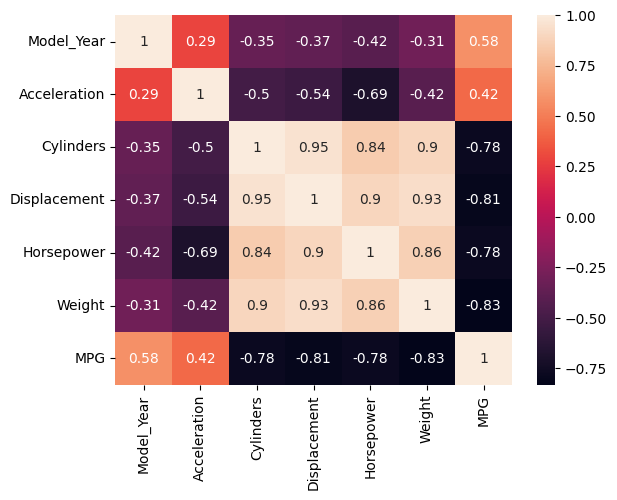

In [37]:
# Exploratory Data Analysis
# create a correlation matrix
correlation_matrix = df.corr()
# print a correlation heat map
sns.heatmap(data=correlation_matrix, annot=True)

<Figure size 1300x1700 with 0 Axes>

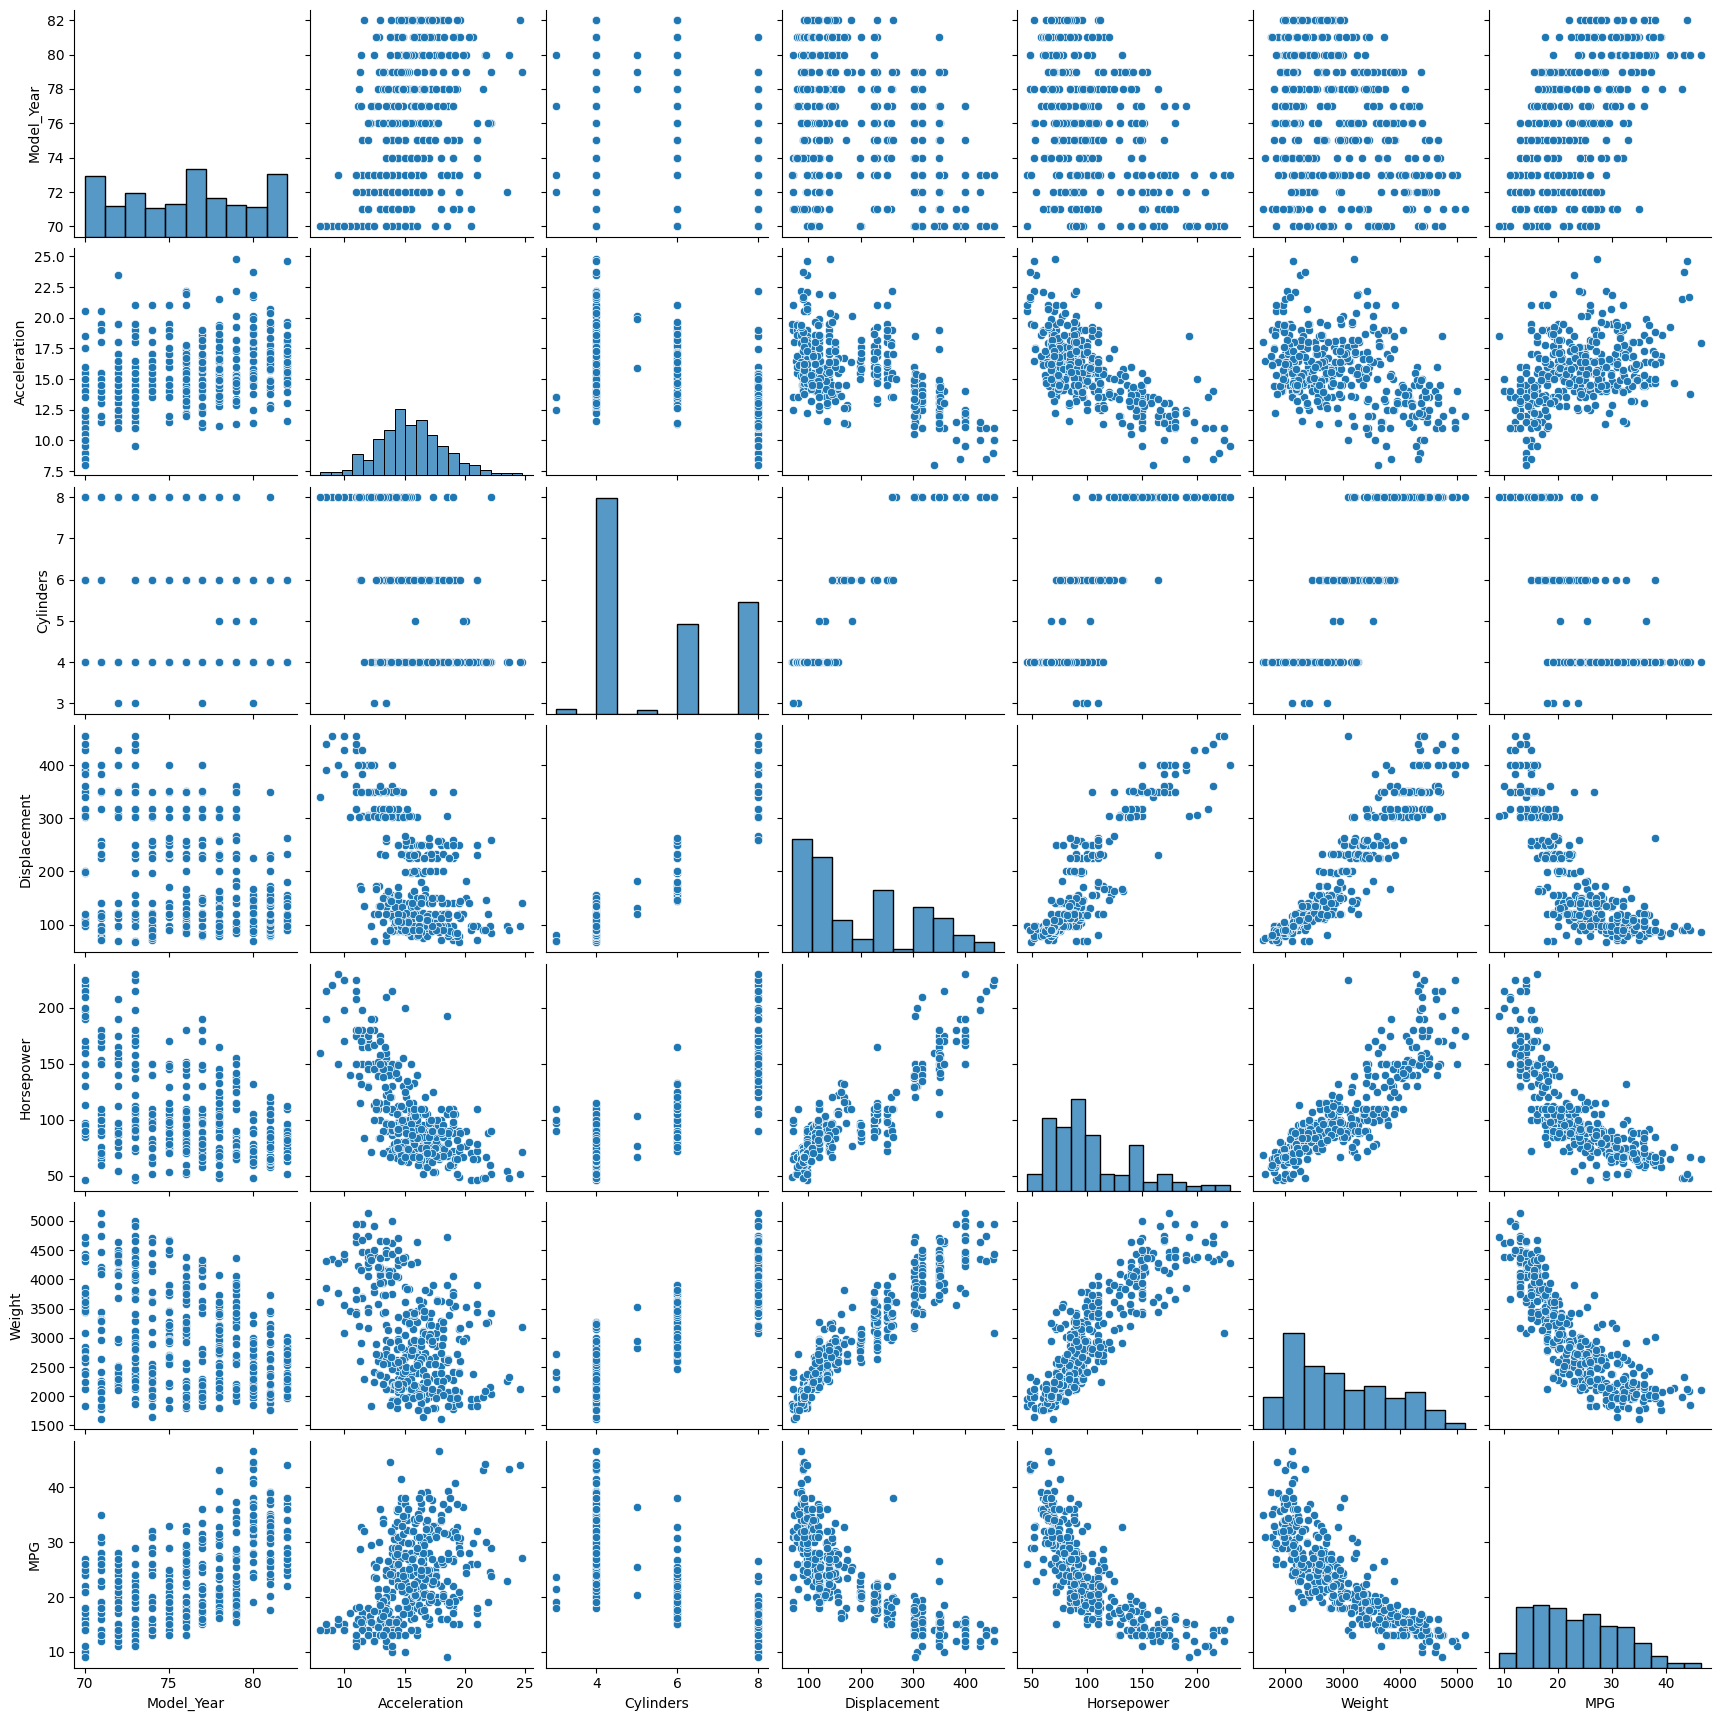

In [36]:
# Exploratory Data Analysis
plt.figure(figsize=(13,17))
sns.pairplot(data=df)
plt.show()

# Selecting Independent and Dependent Variables

In multiple linear regression analysis, choosing the right independent (predictor) and dependent (target) variables is crucial for building an effective model. This selection process directly impacts the model's predictive accuracy and its ability to provide meaningful insights.

## Dependent Variable

The **dependent variable**, also known as the target variable, is what you are trying to predict or explain. It is dependent on the independent variables. In the context of regression analysis, there should be a single dependent variable, and it should be continuous (interval or ratio scale).

In this example with the `carbig.csv`, we are trying to predict the MPG (miles per gallon).

## Independent Variables

**Independent variables**, or predictors, are the inputs to the model. These are the variables you believe have an impact on the dependent variable. In multiple linear regression, you can have two or more independent variables.

- **Criteria for Selection**:
    - **Relevance**: The variable should have a theoretical justification for inclusion in the model.
    - **No Multicollinearity**: Independent variables should not be too highly correlated with each other.
    - **Data Quality**: Variables should have reliable data without too many missing values.


## Selection Techniques

There are several techniques for selecting the right variables for your regression model:

1. **Domain Knowledge**: Use expert knowledge in the field to select variables that are known to influence the outcome.
2. **Data Exploration**: Use statistical techniques to find relationships between variables, such as correlation matrices and scatter plots.
3. **Automated Selection Methods**:
    - **Forward Selection**: Start with no variables in the model, adding them one by one based on statistical criteria.
    - **Backward Elimination**: Start with all candidate variables, removing the least significant one at a time.
    - **Stepwise Regression**: A combination of forward selection and backward elimination, adding and removing variables based on criteria.

## Importance of Proper Selection

Choosing the right variables is not just about improving model accuracy. It also ensures that the model is interpretable and relevant for decision-making. An overly complex model with too many variables can be as problematic as a model that misses key predictors. The goal is to strike a balance between simplicity and predictive power, ensuring that the model remains generalizable and useful for its intended purpose.


In [38]:
# Split the data into independent variables (X) and the dependent variable (Y)
X = df[['Displacement', 'Horsepower', 'Weight', 'Acceleration']]
Y = df['MPG']

# Dataset Splitting in Multiple Linear Regression

In the context of multiple linear regression, as with most predictive modeling techniques, it's crucial to split the dataset into separate subsets for training and testing. This process is fundamental to evaluating the model's performance accurately and ensuring that it generalizes well to unseen data. Here's a breakdown of the dataset splitting process:

## Why Split the Data?

1. **Training Set**: This subset is used to train the model, meaning the regression algorithm uses this data to learn the relationship between the input features (independent variables) and the target variable (dependent variable).

2. **Testing Set**: This subset is used to evaluate the model's performance. It contains data not seen by the model during the training process. By testing the model on unseen data, we can assess its predictive accuracy and generalization ability.

3. **Validation Set (Optional)**: In more complex models or scenarios, a third subset called the validation set may be used during the model tuning phase. This set helps in fine-tuning model parameters without using the test set, thus preventing "information leak" and overfitting. However, in a straightforward multiple linear regression context, splitting into training and testing sets is usually sufficient.

## How to Split the Data?

Data splitting can be done randomly or by following a specific strategy that makes sense for the dataset and problem at hand. A common approach is to randomly split the dataset, with a typical split ratio being 70% for training and 30% for testing, or 80% for training and 20% for testing.

In [39]:
# Split Data into Training and Testing Sets

# Supervised Learning requires training. Therefore, we split the dataset for training and testing purposes.
# Commonly, a 80/20 split is used, i.e., 80% of the data for training and 20% for testing.
# Replace test_size by the testing percentage you would like (0.2 = 20%).

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating and Evaluating a Multiple Linear Regression Model

After splitting the dataset into training and testing sets, the next steps involve creating the multiple linear regression model, testing it on the testing set, and evaluating its performance through error metrics. This process is crucial for understanding how well the model predicts outcomes based on new data.

## Creating the Model

The creation of a multiple linear regression model involves "training" or "fitting" the model using the training set. This training process consists of the model learning the relationship between the independent variables (features) and the dependent variable (target) in the training data. The goal is to find the coefficients (parameters) for each independent variable that minimize the prediction error.

In [40]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

LinearRegression()

# Making Predictions
Once the model is trained, it can be used to make predictions on new data. This is typically done using the testing set, which was not seen by the model during the training phase. The predict method is used to obtain the predicted values:

In [41]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluating the model
To evaluate the model's performance, we compare the predicted values (`y_pred`) against the actual values (`y_test`) in the testing set. Several error metrics can be used for this comparison:

- **Mean Absolute Error (MAE)**: The average absolute difference between the actual and predicted values.
- **Mean Squared Error (MSE)**: The average of the squared differences between the actual and predicted values.
- **Root Mean Squared Error (RMSE)**: The square root of the MSE, providing error in the same units as the target variable.
- **R-squared (R²)**: Represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model.

## Interpreting Errors

- A **lower MSE and RMSE** indicate better model performance.
- An **R² closer to 1** suggests a good fit, indicating that the model explains a significant portion of the variance in the dependent variable.

Understanding these error metrics is essential for interpreting the model's accuracy and predictive power, allowing for adjustments and improvements to the model if necessary.

In [42]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred, squared=False))
print('R^2:',metrics.r2_score(Y_test, Y_pred))

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Absolute Error: 3.5095842124202004
Mean Squared Error: 18.065921762583933
Root Mean Squared Error: 4.250402541240527
R^2: 0.6460478972647498
Coefficients: [-0.00935113 -0.04847209 -0.00502316 -0.05942766]
Intercept: 46.42111226825273


In [43]:
# Plot the results

# Prepare a DataFrame with actual and predicted values
df_results = pd.DataFrame({'Actual MPG': Y_test, 'Predicted MPG': Y_pred})

fig = px.scatter(df_results, x='Actual MPG', y='Predicted MPG', title='Actual vs. Predicted MPG',
                 labels={'Actual MPG': 'Actual MPG', 'Predicted MPG': 'Predicted MPG'},
                 trendline='ols', trendline_color_override='red')

# Adding a marker for the intercept, simplified to use the model's intercept directly
intercept = model.intercept_
# Plot a point for the intercept - this approach plots it off the actual vs predicted line, for illustrative purposes
fig.add_trace(px.scatter(x=[0], y=[intercept], labels={'0': 'Intercept'},).data[0])

fig.update_traces(marker=dict(size=10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Enhancing layout for better readability
fig.update_layout(autosize=False, width=800, height=600, hovermode='closest')

fig.show()

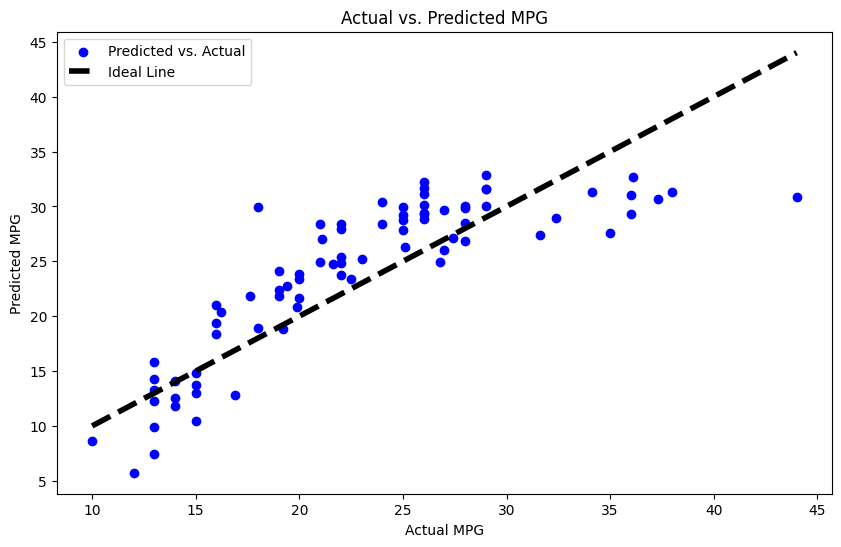

In [44]:
# Plot with matplotlib

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs. Actual')
plt.title('Actual vs. Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4, label='Ideal Line')
plt.legend()
plt.show()


# Ridge and Lasso Regression: Overview and Recommendations

Ridge and Lasso regression are two types of regularized linear regression methods that incorporate penalties on the size of coefficients to prevent overfitting, enhance model interpretability, and handle multicollinearity among predictors.

## Ridge Regression

Ridge Regression, also known as **Tikhonov regularization**, adds a penalty equal to the square of the magnitude of coefficients. This method is useful for reducing the complexity of a model when dealing with multicollinearity (when independent variables are highly correlated).

- **Equation**: The cost function for Ridge Regression is:

$$
\text{Cost function} = \text{RSS} + \lambda\sum_{j=1}^{p} \beta_j^2
$$

where RSS is the residual sum of squares, $\beta_j$ are the coefficients, and $\lambda$ is the regularization parameter.

- **When to Use**: Ridge Regression is recommended when you have a dataset with many small/medium-sized effects. Since Ridge does not force coefficients to be exactly zero, it's suitable when most variables contribute to the outcome.

## Lasso Regression

Lasso Regression, or **Least Absolute Shrinkage and Selection Operator**, introduces a penalty equal to the absolute value of the magnitude of coefficients. Unlike Ridge, Lasso can shrink some coefficients completely to zero, effectively performing variable selection.

- **Equation**: The cost function for Lasso Regression is:

$$
\text{Cost function} = \text{RSS} + \lambda\sum_{j=1}^{p} |\beta_j|
$$

- **When to Use**: Lasso Regression is particularly useful when you have a high number of predictors but expect only a few of them to influence the target variable. Its inherent feature selection capabilities make it suitable for models where parsimony is desired, improving model interpretability by eliminating non-contributory variables.

## Recommendations

- **Ridge** is preferred when the goal is prediction accuracy, and there is reason to believe that many small/medium-sized effects influence the outcome.
- **Lasso** is better suited for models that benefit from variable reduction/selection, providing a more interpretable model by identifying a subset of predictors that have the most significant effects on the target variable.

Both methods are invaluable tools in the statistician's toolbox, especially when dealing with complex datasets that exhibit multicollinearity or when a parsimonious model is required.

In [45]:
print('\n\n---------Training Ridge Regression Model----------------')
# https://www.ibm.com/topics/ridge-regression#:~:text=Ridge%20regression%E2%80%94also%20known%20as,for%20multicollinearity%20in%20regression%20analysis.

ridge = Ridge()
ridge.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred1 = ridge.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred1))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred1, squared=False))
print('R^2:',metrics.r2_score(Y_test, Y_pred1))

# Print the coefficients and intercept
print('Coefficients:', ridge.coef_)
print('Intercept:', ridge.intercept_)


print('\n\n---------Training Lasso Regression Model----------------')
# https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/

lasso = Lasso()
lasso.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred2 = lasso.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred2))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred2, squared=False))
print('R^2:',metrics.r2_score(Y_test, Y_pred2))

# Print the coefficients and intercept
print('Coefficients:', lasso.coef_)
print('Intercept:', lasso.intercept_)



---------Training Ridge Regression Model----------------
Mean Absolute Error: 3.509585238996082
Mean Squared Error: 18.065847843857735
Root Mean Squared Error: 4.250393845734503
R^2: 0.6460493454991058
Coefficients: [-0.00935063 -0.04846562 -0.00502338 -0.0593594 ]
Intercept: 46.419932632903915


---------Training Lasso Regression Model----------------
Mean Absolute Error: 3.5058558766110752
Mean Squared Error: 17.973251178149862
Root Mean Squared Error: 4.239487136217052
R^2: 0.6478635227641404
Coefficients: [-0.0088723  -0.04075986 -0.00529884 -0.        ]
Intercept: 45.42028102110193
